<a href="https://colab.research.google.com/github/Sunday-Okey/Computer_Vision_Project/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Project Workflow

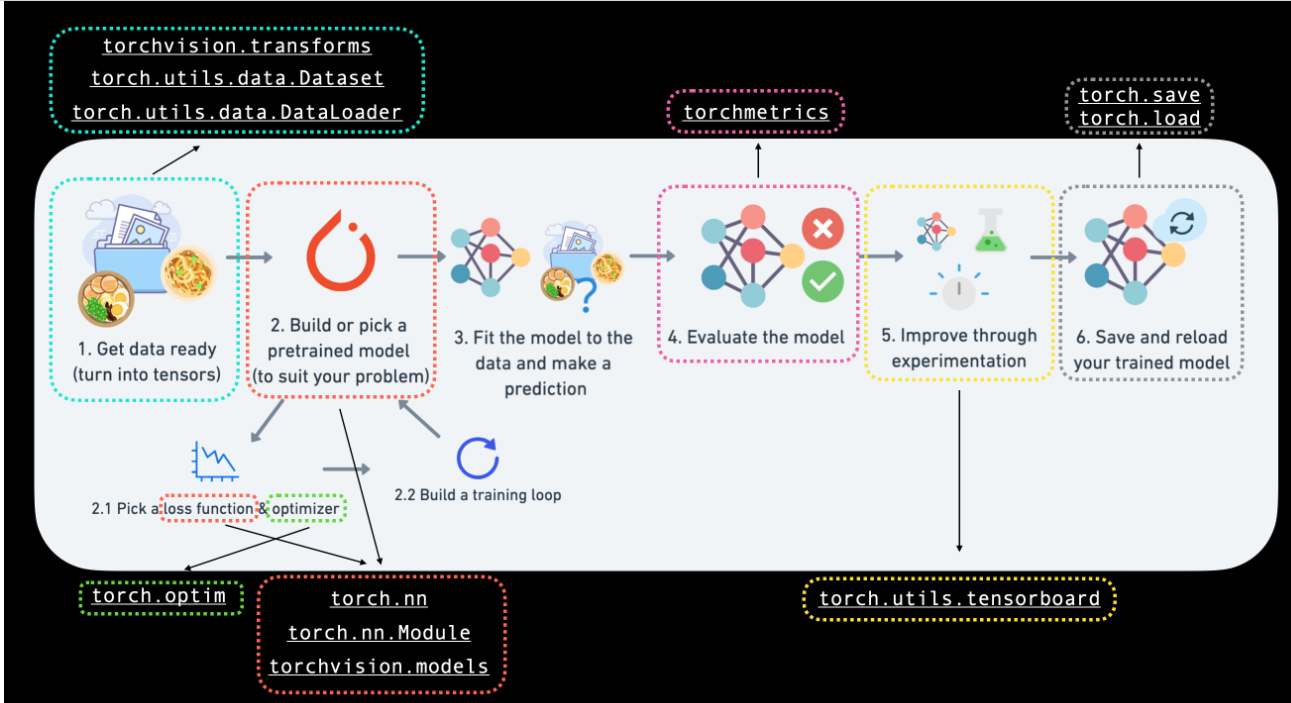

## Import necessary library


In [ ]:
# Import PyTorch
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
# Import visualization functions.
import matplotlib.pyplot as plt
import seaborn as ss

#Import sklearn functions for performace metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#Import numpy
import numpy as np
# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


## 1. Getting a dataset

We're going to use FashionMNIST to demonstrate the application of CNN.

FashionMNIST contains grayscale images of 10 different kinds of clothing.


torchvision.datasets contains a lot of example datasets. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.

In [ ]:
def load_fashion_mnist(is_train: bool):
    """Load FashionMNIST dataset.

    Args:
    is_train (bool): Flag indicating whether to load training or test set.

    Returns:
    Dataset: The requested dataset.
    """
    return datasets.FashionMNIST(
        root="data",
        train=is_train,
        download=True,
        transform=ToTensor()
    )

# Now load the datasets using the function
train_dataset = load_fashion_mnist(is_train=True)
test_dataset = load_fashion_mnist(is_train=False)

In [ ]:
# let see first training sample
image, label = train_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
# How many samples do we have?

len(train_dataset.data), len(train_dataset.targets), len(test_dataset.data), len(test_dataset.targets)

(60000, 60000, 10000, 10000)

So we have 60000 training samples and 10000 testing examples.

Let's check their classes.

In [ ]:
# Check classes
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
len(class_names)

10

## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


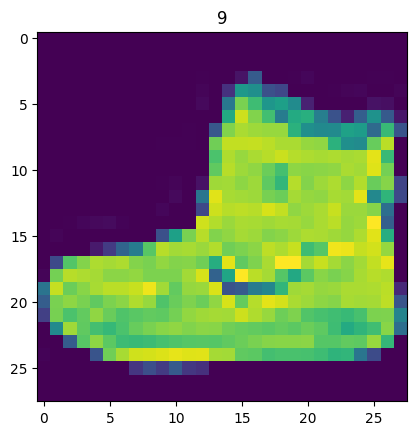

In [ ]:
import matplotlib.pyplot as plt
image, label = train_dataset[0]
print(f"Image shape: {image.shape}")
plt.imshow(np.transpose(image,(1,2,0)))
plt.title(label);

## Convert the image to grayscale

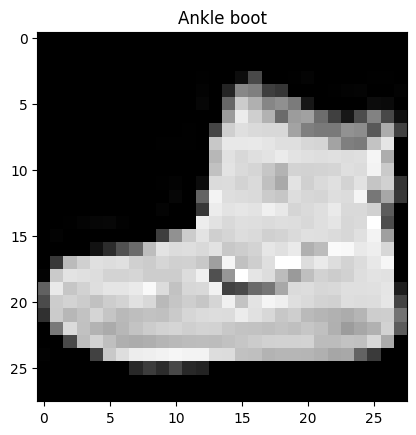

In [ ]:
plt.imshow(image.squeeze(0), cmap="gray")
plt.title(class_names[label]);

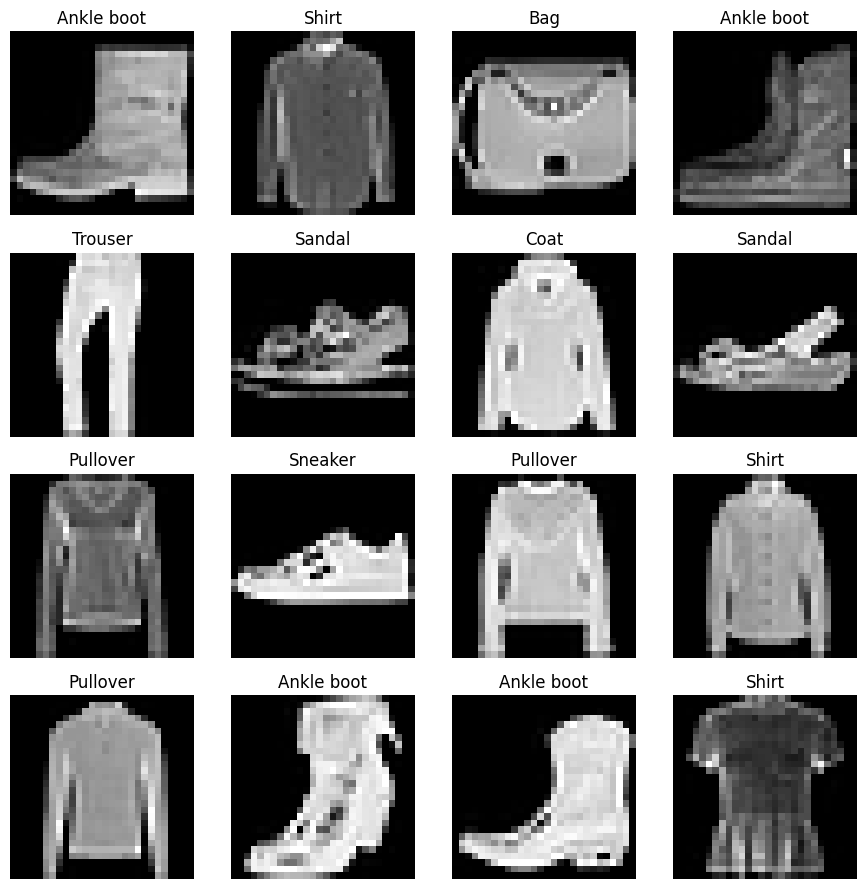

In [ ]:
# Set the random seed for reproducibility
torch.manual_seed(42)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(9, 9))

# Flatten the axes array for convenient iteration
axes_flat = axes.flatten()

# Plot images in a 4x4 grid
for ax in axes_flat:
    random_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[random_idx]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(class_names[label])
    ax.axis('off')  # This turns off the axis lines and labels

# Adjust the layout so titles and images don't overlap
plt.tight_layout()
plt.show()

## 2. Prepare DataLoader

In [ ]:
from torch.utils.data import DataLoader

# Define the batch size for the data loading
batch_size = 64


# Create DataLoader instances for training and testing datasets
train_loader = DataLoader(dataset=train_dataset,  # The dataset to wrap
                          batch_size=batch_size,  # Number of samples per batch
                          shuffle=True)  # Shuffle the data at every epoch

test_loader = DataLoader(dataset=test_dataset,  # The dataset to wrap
                         batch_size=batch_size,  # Number of samples per batch
                         shuffle=False)  # No need to shuffle the test data

# Output the details of the DataLoader instances created
print("DataLoaders:", (train_loader, test_loader))
print(f"Number of batches in train_loader: {len(train_loader)} (Each batch has {batch_size} samples)")
print(f"Number of batches in test_loader: {len(test_loader)} (Each batch has {batch_size} samples)")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d9101ac58d0>, <torch.utils.data.dataloader.DataLoader object at 0x7d9101ac5960>)
Number of batches in train_loader: 938 (Each batch has 64 samples)
Number of batches in test_loader: 157 (Each batch has 64 samples)


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

And we can see that the data remains unchanged by checking a single sample.

Image size: torch.Size([1, 28, 28])
Label: 6, Label size: torch.Size([])


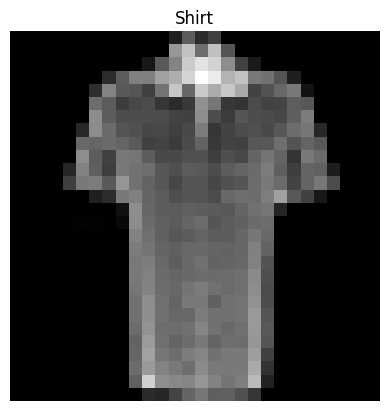

In [ ]:
import matplotlib.pyplot as plt
import torch

# Ensure reproducibility
torch.manual_seed(42)

# Choose a random sample from the batch
random_index = torch.randint(len(train_features_batch), (1,)).item()
sample_image, sample_label = train_features_batch[random_index], train_labels_batch[random_index]

# Display the image
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(class_names[sample_label])
plt.axis('off')  # Turns off the axis lines and labels

# Print the size of the image and the label
print(f"Image size: {sample_image.shape}")
print(f"Label: {sample_label}, Label size: {sample_label.shape}")


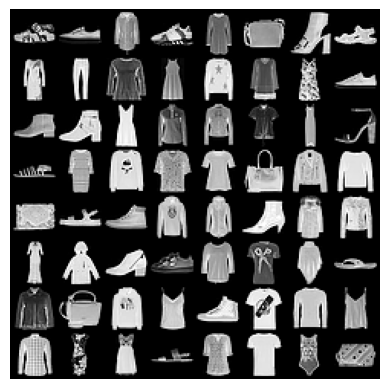

In [ ]:
#Visualizing single batch images
def intensityscale(raw_img):

    # scale an image's intensity from [min, max] to [0, 1].
    v_min, v_max = raw_img.min(), raw_img.max()
    scaled_im = (raw_img * 1.0 - v_min) / (v_max - v_min)



    # clip to [0, 1]
    scaled_im = np.clip(scaled_im, 0, 1)

    return scaled_im

def imshow(img):
  img=intensityscale(img)
  npimg=img.numpy()
  plt.grid("off")
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.axis("off")
  plt.show()



imshow(torchvision.utils.make_grid(train_features_batch))

## 3.1 Model 1: Build a baseline model such MLP

In [ ]:
class MLP_Net(nn.Module):
  """
  Construct a MLP Network
  """

  def __init__(self, input_feature_num, hidden_unit_nums, output_feature_num):
    """
    Initialize MLP Network parameters

    Args:
      input_feature_num: int
        Number of input features
      hidden_unit_nums: list
        Number of units per hidden layer, list of integers
      output_feature_num: int
        Number of output features

    Returns:
      Nothing
    """
    super(MLP_Net, self).__init__()
    self.input_feature_num = input_feature_num # Save the input size for reshaping later

    self.output_feature_num=output_feature_num
    self.mlp = nn.Sequential() # Initialize layers of MLP

    # Use for loop to create hidden layer and add them to the self.mlp
    for i in range(len(hidden_unit_nums)):
      if i==0:#To initialize input images and image shape as number of nodes
        layer=nn.Linear(input_feature_num,hidden_unit_nums[i])#This is first layer
      else:
        layer=nn.Linear(hidden_unit_nums[i-1],hidden_unit_nums[i])#Adds the number of hidden layers based on user input
      self.mlp.add_module(name="FC "+str(i),module=layer)# adding layer module into sequential object
      self.mlp.add_module(name='RELU '+str(i),module=nn.ReLU())# Adding an non linear activation layer
    self.mlp.add_module(name='output layer',module=nn.Linear(hidden_unit_nums[-1],output_feature_num))# Adding final layer

  def forward(self, x):
    """
    Perform the forward pass

    Args:
      x: tensor
        input images

    Returns:
      Nothing
    """

    x=torch.flatten(x,1)#Flat the image shape (batch_size,image shape)
    x=self.mlp(x)#Send the batch of images into fully connected layer
    return x

In [ ]:
input_features=28*28#Image shape
hidden_layer_nodes=[40,30,20]# 3 hidden layers
output_features=10# Total number of classes

#Create a MLP FC class object and assign weights
model1=MLP_Net(input_features,hidden_layer_nodes,output_features)
#Lets look at the model structure
model1

MLP_Net(
  (mlp): Sequential(
    (FC 0): Linear(in_features=784, out_features=40, bias=True)
    (RELU 0): ReLU()
    (FC 1): Linear(in_features=40, out_features=30, bias=True)
    (RELU 1): ReLU()
    (FC 2): Linear(in_features=30, out_features=20, bias=True)
    (RELU 2): ReLU()
    (output layer): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [ ]:
# Create Train and Test functions for code reproducibility
def Train_and_Test(train_loader,test_loader,model,criterion,optimizer,device,epochs,verbose=True):
  """
    Train MLP model with the training dataset and create optimal parameters

    Args:
      train_loader: DataLoader Object
        Consist of training example batches with labels
      test_loader:DataLoader Object
        Consist of testing example batches with labels
      Model: class object
        MLP model objects with 3 hidden layers
      criterion: Loss function
        Calculate loss with the given probability to the actual labels
      optimizer:Optimizer function
      Epochs:int
        Number of time to iterate through training samples.
      device:CPU or GPU

    Returns:
      Model parameters
      training_loss
    """

  """ Seting up training pipeline """
  training_loss=[]
  model.to(device)
  for epoch in range(epochs):
    print("Epochs : "+str(epoch))
    for i,data in enumerate(train_loader):
      # Get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device).float()
            labels = labels.to(device).long()

          # Zero the parameter gradients
            optimizer.zero_grad()

          # forward + backward + optimize
            outputs = model(inputs)

          #Calculate loss function
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

          # Print statistics
            if verbose:
                training_loss += [loss.item()]

  model.eval()

  def test(loader):
    testing_loss=[]
    model.to(device)
    predicted_labels=[]
    actual_labels=[]
    #total=0
    #correct=0
    for i,data in enumerate(loader):
      test_input,test_labels=data
      test_input=test_input.to(device).float()
      test_labels=test_labels.to(device).long()

      test_output=model(test_input)
      #calculate testing loss
      test_loss=criterion(test_output,test_labels)
      #adding loss values in to list for later visualisation
      if verbose:
        testing_loss.extend([test_loss.item()])
      #Finding the predicted labels
      x,predicted=torch.max(test_output,1)
      # adding batch sizes into a variable to downstream tasks
      #total+=test_labels.size(0)
      #Adding the number of correct predictions
      #correct+=(predicted==test_labels).sum().item()
      #Add all acutal labels for this batch
      actual_labels.extend(test_labels.cpu().numpy())
      #Add all predicted labels for this batch
      predicted_labels.extend(predicted.cpu().numpy())

    confusion=confusion_matrix(predicted_labels,actual_labels)
    test_classification=classification_report(predicted_labels,actual_labels)
    return testing_loss,confusion,test_classification
  testing_loss,test_confusion,test_classification=test(test_loader)

  return training_loss,testing_loss,test_confusion,test_classification


## Setting GPU

In [ ]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cpu


In [ ]:
#Let us initialise loss function and optimiser function
criterion = nn.CrossEntropyLoss() # define loss for multiclass classification
optimizer = optim.Adam(model1.parameters(), lr=2e-3) # define the optimizer

training_loss,testing_loss,test_confusion,test_classification=Train_and_Test(train_loader,test_loader,model1,criterion,optimizer,device,epochs=5,verbose=True)


Epochs : 0
Epochs : 1
Epochs : 2
Epochs : 3
Epochs : 4


In [ ]:
#Create a function to visualize confussion matrix
def plot_confussion_matrix(cm):

  """
  Plot the confussion matrix
  arg:
    cm:confussion matric object

  return:
    nothing
  """
  ax=plt.subplot()
  ss.heatmap(cm,annot=True,ax=ax,fmt="d",cmap='Blues')
  ss.set(rc={'figure.figsize':(11,7)})
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(class_names)
  ax.yaxis.set_ticklabels(class_names)





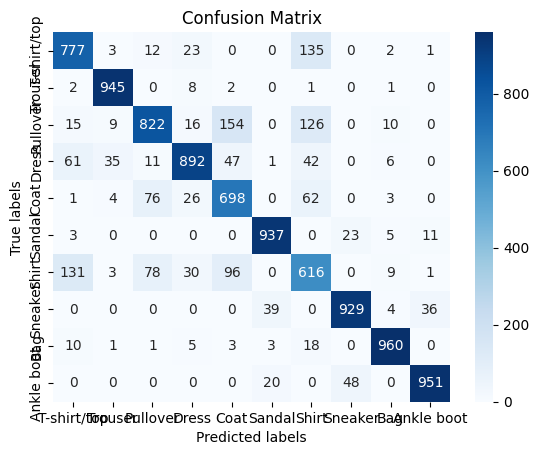

In [ ]:
plot_confussion_matrix(test_confusion)

In [ ]:
# Create a function to visualize the loss function.
def plot_loss(loss):
  """
  Plot the loss values for loss values
  """
  plt.plot(loss)
  plt.xlabel("Batches")
  plt.ylabel("loss")
  plt.show()



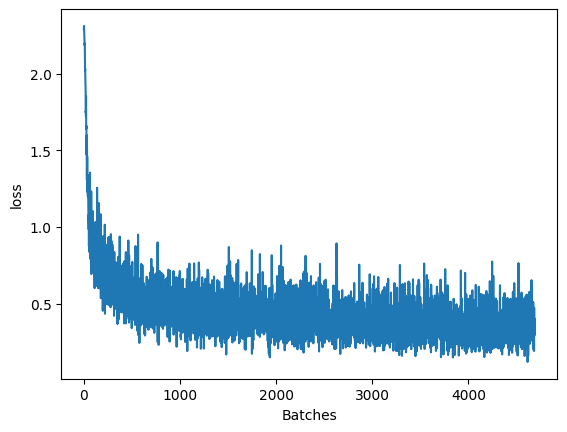

In [ ]:
#Visualise the training loss
plot_loss(training_loss)

In [ ]:
print(test_classification)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       946
           1       0.95      0.99      0.97       956
           2       0.67      0.83      0.74       803
           3       0.85      0.87      0.86       981
           4       0.80      0.73      0.76      1093
           5       0.92      0.97      0.95       947
           6       0.71      0.59      0.64      1211
           7       0.97      0.88      0.93      1106
           8       0.96      0.95      0.96      1011
           9       0.92      0.97      0.95       946

    accuracy                           0.85     10000
   macro avg       0.85      0.86      0.86     10000
weighted avg       0.86      0.85      0.85     10000



## 3.1 Model 2: Build an advance Convolution neural network class to indentity features and edges in the image


## Alright, time to step things up a notch.

Building a Convolutional Neural Network (CNN)

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """

    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x=self.avgpool(x)
        x = self.classifier(x)
        # print(x.shape)
        return x

### Training and testing model_2 using our training and test functions

### Let's create a function for training and test loops

In [ ]:
# Initialize empty lists to store loss values
train_loss_values = []
test_loss_values = []

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

    # Append the training loss to the list
    train_loss_values.append(train_loss)


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

        # Append the test loss to the list
        test_loss_values.append(test_loss)


### Setup a loss function and optimizer for model_2

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=20,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=980, out_features=10, bias=True)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
)

In [ ]:
# Let's setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
def print_train_time(start, end, device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time



### Let's also time things to see how long our code takes to run on the GPU.

In [ ]:
import torch
from timeit import default_timer as timer
from tqdm import tqdm

# Set manual seed for reproducibility
torch.manual_seed(42)

# Begin timing
train_time_start = timer()

# Training parameters
epochs = 2

# Training and testing loop
for epoch in tqdm(range(epochs), desc="Training Epochs"):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2,
               data_loader=train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)  # Pass the device here
    test_step(model=model_2,
              data_loader=test_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)  # Pass the device here

# End timing
train_time_end = timer()

# Calculate and print total training time
def print_train_time(start, end, device_name):
    total_time = end - start
    print(f"Total training time on {device_name}: {total_time:.2f} seconds")
    return total_time

total_train_time = print_train_time(start=train_time_start,
                                    end=train_time_end,
                                    device_name=device)


Training Epochs:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.64955 | Train accuracy: 76.53%


Training Epochs:  50%|█████     | 1/2 [01:55<01:55, 115.22s/it]

Test loss: 0.39330 | Test accuracy: 86.12%

Epoch: 1
---------
Train loss: 0.35508 | Train accuracy: 87.12%


Training Epochs: 100%|██████████| 2/2 [03:49<00:00, 114.65s/it]

Test loss: 0.35458 | Test accuracy: 87.10%

Total training time on cpu: 229.30 seconds


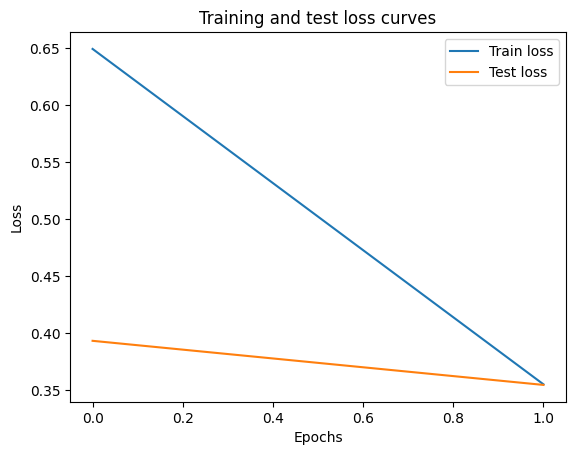

In [ ]:
# Plot the loss curves
epoch_counts = list(range(epochs))
train_loss_values = np.array(torch.tensor(train_loss_values).numpy())
test_loss_values = np.array(torch.tensor(test_loss_values).numpy())

plt.plot(epoch_counts, train_loss_values, label='Train loss')
plt.plot(epoch_counts, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.35457944869995117,
 'model_acc': 87.10191082802548}

## Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_dataset), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 9 (Ankle boot)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[3.9967e-07, 3.4909e-07, 8.4595e-07, 2.9654e-05, 1.6121e-06, 8.7788e-04,
         4.9445e-06, 3.1411e-02, 3.7594e-05, 9.6764e-01],
        [6.9158e-01, 9.6612e-06, 4.3546e-04, 3.3113e-02, 5.3837e-06, 1.3593e-05,
         2.7466e-01, 6.2753e-06, 1.1714e-04, 5.8728e-05]])

In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[3.9967e-07, 3.4909e-07, 8.4595e-07, 2.9654e-05, 1.6121e-06, 8.7788e-04,
         4.9445e-06, 3.1411e-02, 3.7594e-05, 9.6764e-01],
        [6.9158e-01, 9.6612e-06, 4.3546e-04, 3.3113e-02, 5.3837e-06, 1.3593e-05,
         2.7466e-01, 6.2753e-06, 1.1714e-04, 5.8728e-05]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 0, 8, 3, 2, 3, 8, 8, 1])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([9, 0, 8, 3, 2, 3, 8, 8, 1], tensor([9, 0, 8, 3, 2, 3, 8, 8, 1]))

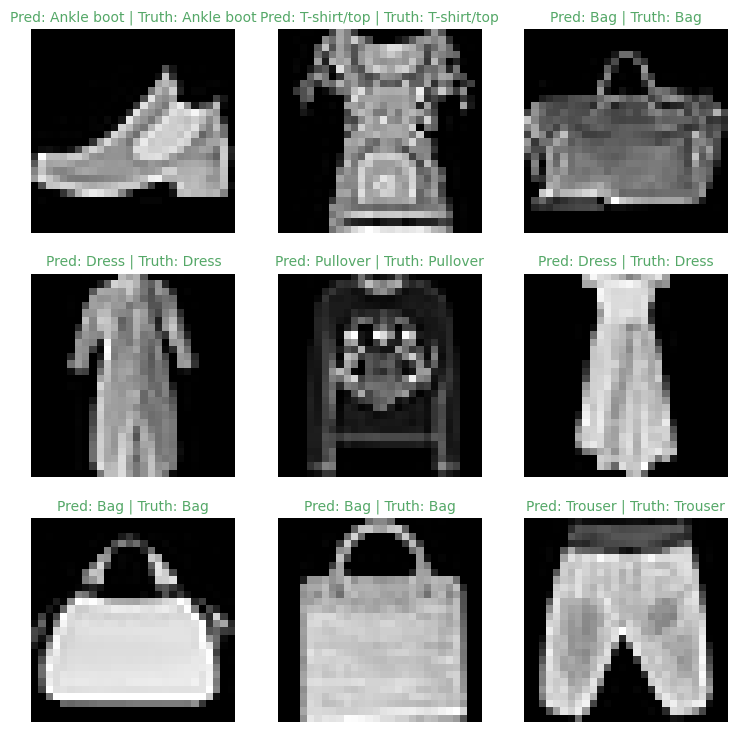

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_loader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


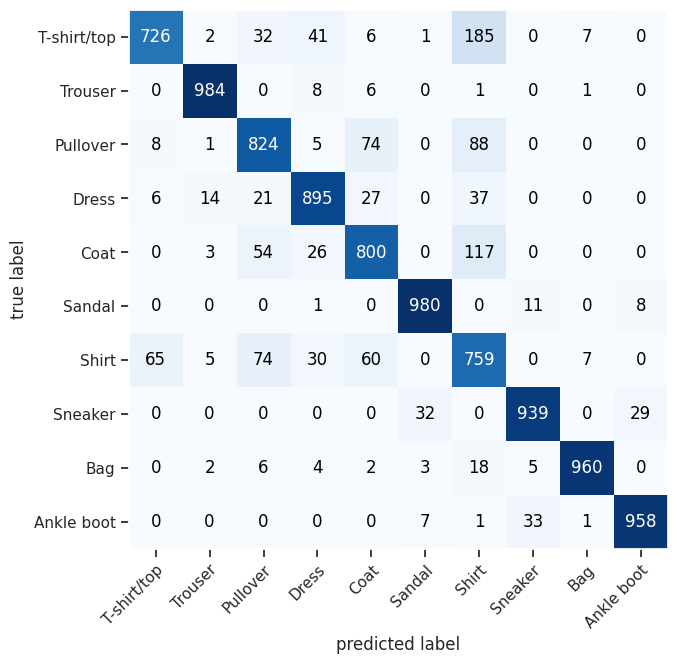

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_dataset.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## Lets Implement Alexnet achitecture for this data (MODEL 3)

In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Alex net is done on color images, since the MNIST fashion dataset is on grey scale necessary transformation is required for this grey scale image

In [ ]:
#Resizing the original image. We tried with size of 224 X 224 as alexnet input image size. But the kernel is dying because of load. so we choosed with less size.
def resize_image(data):
  return F.interpolate(data,size=((56, 56)))

In [ ]:
# Function to convert greyscale image to RBG image as alexnet architecture is build on color images
def convertgrey_to_RBG(loader):
  """
  Loader: Data Loader Object
  """
  new_dataloader=[]
  for i,(data,label) in enumerate(loader):
    data=data.squeeze()
    new_data=np.repeat(data[..., np.newaxis], 3, -1).permute(0,3,1,2)
    new_dataloader.append((resize_image(new_data),label))

  return new_dataloader


In [ ]:
#Transform the training image
train_loader1=convertgrey_to_RBG(train_loader)

In [ ]:
test_loader1=convertgrey_to_RBG(test_loader)

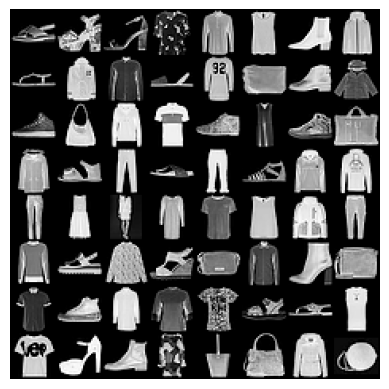

In [ ]:

a,b=next(iter(train_loader1))
imshow(torchvision.utils.make_grid(a))

In [ ]:
# Create a Alexnet convolutional neural network
class FashionMNISTModelV3(nn.Module):
    """
    https://pytorch.org/hub/pytorch_vision_alexnet/
    """
    def __init__(self, output_shape: int):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 20, kernel_size=3, padding=2),
            nn.ReLU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Linear(20 * 6 * 6, 50),
            nn.ReLU(),
            nn.Linear(50, output_shape),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:
#Let us initialise loss function and optimiser function
criterion = nn.CrossEntropyLoss() # define loss for multiclass classification
model_3 = FashionMNISTModelV3(output_shape=len(class_names)).to(device)
optimizer = optim.Adam(model_3.parameters(), lr=0.001) # define the optimizer
train_step(model=model_3,
               data_loader=train_loader1,
               loss_fn=criterion,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)


Train loss: 0.76577 | Train accuracy: 70.43%


In [ ]:
test_step(model=model_3,
              data_loader=test_loader1,
              loss_fn=criterion,
              accuracy_fn=accuracy_fn,
              device=device)

Test loss: 0.45562 | Test accuracy: 81.83%



In [ ]:
model_3_results = eval_model(
    model=model_3,
    data_loader=test_loader1,
    loss_fn=criterion,
    accuracy_fn=accuracy_fn
)
model_3_results

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.45562344789505005,
 'model_acc': 81.82722929936305}